<a href="https://colab.research.google.com/github/marwanhaqiqi/Ujian-Tengah-Semester/blob/main/UTS_PM_1227050049_GallungMarwanHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis dan Implementasi Model Klasifikasi Decision Tree untuk Dataset Buah Jeruk/Anggur**

**Soal 1: Tahapan Pembuatan Model Klasifikasi Decision Tree**

**Berikut adalah tahapan lengkap untuk membangun model klasifikasi **

**Decision Tree:**

1. **Pemahaman Data**

Dataset berisi informasi tentang buah (jeruk/anggur) dengan fitur:

*   diameter: diameter buah
*   weight: berat buah
*   red, green, blue: nilai warna RGB buah

Target: kolom 'name' (orange/grape)

2. **Persiapan Data**
- Memeriksa data yang hilang (missing values)
- Memeriksa ketidakseimbangan kelas (class imbalance)
- Memeriksa outlier
- Memeriksa korelasi antar fitur

3. **Pra-pemrosesan Data**

- Encoding label (mengubah 'orange' dan 'grape' ke nilai numerik)
- Normalisasi/standarisasi jika diperlukan
- Split data menjadi training dan testing set (biasanya 70-30 atau 80-20)

4. **Pemilihan Fitur**

Analisis pentingnya fitur menggunakan teknik seperti:
- Feature importance dari Decision Tree
- Korelasi dengan target
- Uji statistik

5. **Pembangunan Model Decision Tree**

Memilih parameter seperti:
- Kriteria pemisahan (Gini/Entropy)
- Kedalaman maksimum pohon (max_depth)
- Minimum sampel per leaf
- Minimum sampel untuk split

Melatih model dengan data training

6. **Evaluasi Model**

Menggunakan metrik evaluasi:
- Akurasi
- Presisi
- Recall
- F1-score
- Confusion matrix

Validasi silang (cross-validation) untuk menilai performa yang lebih stabil

7. **Penyempurnaan Model**
- Tuning hyperparameter menggunakan GridSearchCV atau RandomSearchCV
- Evaluasi ulang setelah tuning

8. **Interpretasi Model**
- Visualisasi pohon keputusan
- Analisis aturan keputusan yang dihasilkan

**Soal 2: Implementasi Python**

Kolom-kolom dataset: ['name', 'diameter', 'weight', 'red', 'green', 'blue']
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
Akurasi: 0.106
Classification Report:
               precision    recall  f1-score   support

           4       0.34      0.32      0.33       549
           9       0.04      0.04      0.04        57
          16       0.04      0.05      0.04        58
           6       0.05      0.05      0.05        61
          13       0.03      0.03      0.03        72
          12       0.02      0.01      0.02        67
           5       0.03      0.03      0.03        63
          22       0.02      0.02      0.02        58
          10       0.03      0.03      0.03        71
          15       0.04      0.03      0.04        62
           7  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


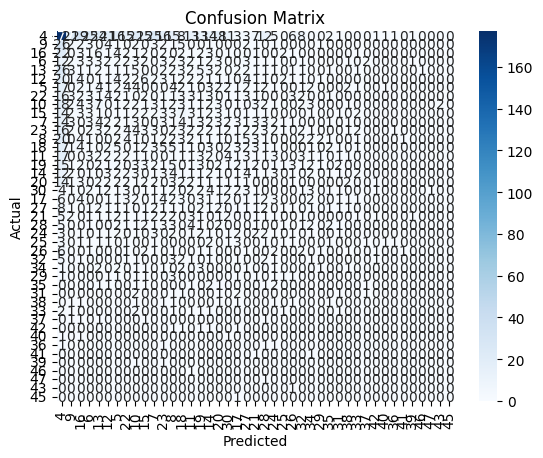

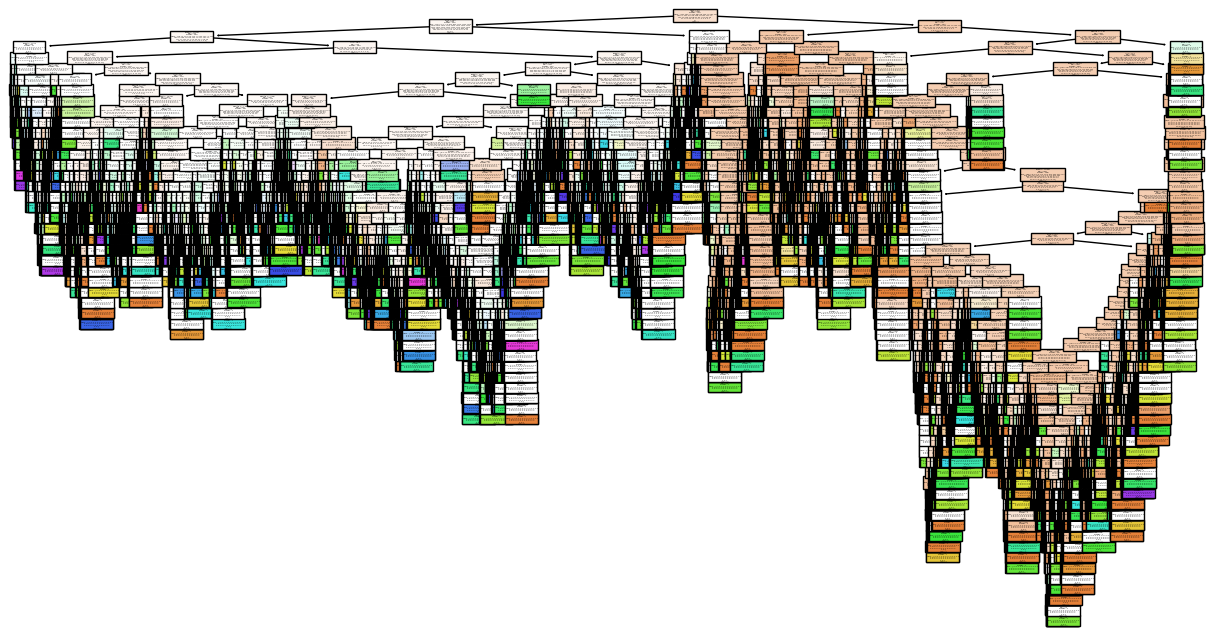

In [6]:
# 1. Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load Dataset
df = pd.read_csv('/content/sample_data/citrus.csv')

# 3. Cek kolom dan isi awal
print("Kolom-kolom dataset:", df.columns.tolist())
print(df.head())

# 4. Tentukan kolom target (diasumsikan kolom terakhir adalah label)
target_column = df.columns[-1]

# 5. Bersihkan data (hapus semua baris yang mengandung NaN)
df = df.dropna()

# 6. Pisahkan fitur dan label
X = df.drop(columns=[target_column])
y = df[target_column]

# 7. Encode fitur kategorikal (jika ada)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# 8. Encode label (target)
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    class_names = le.classes_
else:
    class_names = y.unique().astype(str)

# 9. Buang kelas yang hanya muncul sekali (agar stratify tidak error)
class_counts = pd.Series(y).value_counts()
valid_classes = class_counts[class_counts >= 2].index
X = X[pd.Series(y).isin(valid_classes)]
y = pd.Series(y)[pd.Series(y).isin(valid_classes)]

# 10. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 11. Buat dan latih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 12. Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Ambil label yang digunakan saja
labels_in_test = np.unique(y_test)
names_in_test = [class_names[i] for i in labels_in_test]

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, labels=labels_in_test, target_names=names_in_test
))

# 13. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels_in_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names_in_test, yticklabels=names_in_test)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 14. Visualisasi Decision Tree
plt.figure(figsize=(15, 8))
plt.title("Decision Tree Visualization")
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


Jumlah missing values sebelum pembersihan:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Nilai unik dalam kolom 'name': ['orange' 'grape']
Nilai unik dalam label: [0 1]

Model berhasil dilatih

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
[[1000    0]
 [   0 2000]]

Akurasi Model: 1.0


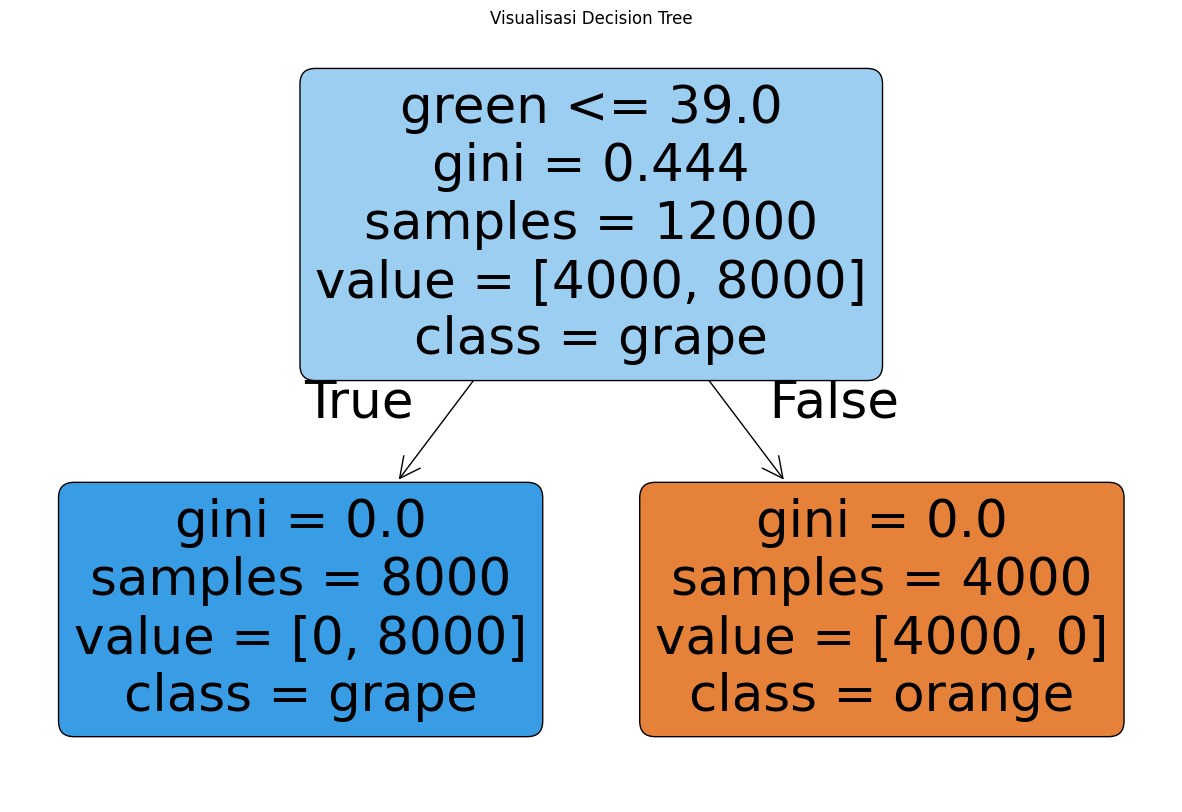


Feature Importance:
green       1.0
diameter    0.0
weight      0.0
red         0.0
blue        0.0
dtype: float64


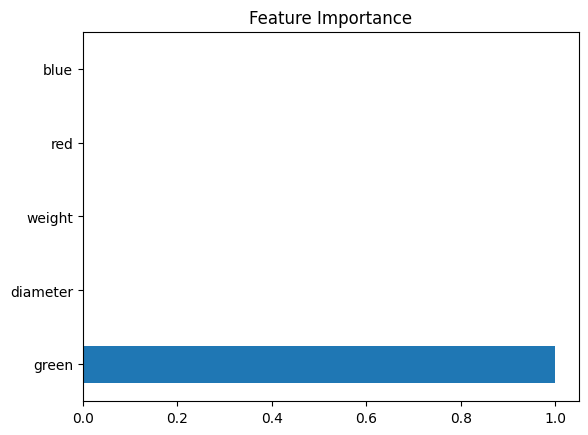


Hasil Validasi Silang (5-fold):
Akurasi rata-rata: 1.0
Standar deviasi: 0.0


In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Membaca dataset jeruk
df_orange = pd.read_csv('/content/sample_data/citrus.csv')

# Membuat data sintetis untuk anggur dengan karakteristik yang berbeda
np.random.seed(42)
num_samples = len(df_orange)

# Membuat dataframe anggur
grape_data = {
    'name': ['grape'] * num_samples,
    'diameter': np.random.uniform(0.5, 2.5, num_samples),  # Anggur lebih kecil
    'weight': np.random.uniform(30, 80, num_samples),      # Anggur lebih ringan
    'red': np.random.randint(70, 180, num_samples),        # Anggur lebih merah
    'green': np.random.randint(0, 30, num_samples),        # Anggur kurang hijau
    'blue': np.random.randint(0, 50, num_samples)          # Anggur kurang biru
}

grape_df = pd.DataFrame(grape_data)

# Menggabungkan data jeruk dan anggur
full_df = pd.concat([df_orange, grape_df], ignore_index=True)

# 1. Pembersihan Data secara Menyeluruh
# Memeriksa dan menghapus baris dengan missing values
print("Jumlah missing values sebelum pembersihan:")
print(full_df.isnull().sum())

# Menghapus baris dengan missing values
full_df = full_df.dropna()

# Memastikan kolom 'name' hanya berisi 'orange' atau 'grape'
valid_names = ['orange', 'grape']
full_df = full_df[full_df['name'].isin(valid_names)]

# 2. Pra-pemrosesan Data dengan Validasi Ekstra
# Encoding label dengan validasi
full_df['label'] = full_df['name'].map({'orange': 0, 'grape': 1})

# Memastikan tidak ada nilai yang tidak terdefinisi dalam label
print("\nNilai unik dalam kolom 'name':", full_df['name'].unique())
print("Nilai unik dalam label:", full_df['label'].unique())

# Memisahkan fitur dan target dengan validasi tambahan
X = full_df[['diameter', 'weight', 'red', 'green', 'blue']].copy()
y = full_df['label'].copy()

# Konversi ke numpy array dan pastikan tipe data numerik
X = X.values.astype(np.float64)
y = y.values.astype(np.int64)

# 3. Pembagian Data dengan Validasi
# Membagi data dengan pengecean NaN tambahan
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mempertahankan distribusi kelas
)

# 4. Membangun Model dengan Validasi Input
# Membuat classifier Decision Tree
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Melatih model dengan pengecekan data
try:
    clf.fit(X_train, y_train)
    print("\nModel berhasil dilatih")
except ValueError as e:
    print("\nError saat melatih model:", e)
    # Diagnosa lebih lanjut
    print("Jumlah NaN dalam X_train:", np.isnan(X_train).sum())
    print("Jumlah NaN dalam y_train:", np.isnan(y_train).sum())

# 5. Evaluasi Model
if hasattr(clf, 'predict'):
    y_pred = clf.predict(X_test)

    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nAkurasi Model:", accuracy_score(y_test, y_pred))

    # Visualisasi Decision Tree
    plt.figure(figsize=(15,10))
    tree.plot_tree(clf,
                   feature_names=['diameter', 'weight', 'red', 'green', 'blue'],
                   class_names=['orange', 'grape'],
                   filled=True,
                   rounded=True)
    plt.title("Visualisasi Decision Tree")
    plt.show()

    # Feature Importance
    feature_importance = pd.Series(clf.feature_importances_,
                                 index=['diameter', 'weight', 'red', 'green', 'blue'])
    feature_importance.sort_values(ascending=False, inplace=True)

    print("\nFeature Importance:")
    print(feature_importance)

    feature_importance.plot(kind='barh', title='Feature Importance')
    plt.show()

    # Validasi Silang
    from sklearn.model_selection import cross_val_score

    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("\nHasil Validasi Silang (5-fold):")
    print("Akurasi rata-rata:", cv_scores.mean())
    print("Standar deviasi:", cv_scores.std())
else:
    print("\nModel tidak dapat dievaluasi karena gagal dalam pelatihan")

**Penjelasan Implementasi:**

1. **Persiapan Data:**
- Karena dataset yang diberikan hanya berisi data jeruk, saya membuat data sintetis untuk anggur agar bisa melakukan klasifikasi biner.
- Dalam praktik nyata, Anda akan menggunakan dataset lengkap yang sudah memiliki kedua kelas.

2. **Pra-pemrosesan:**
- Mengubah label kategori ('orange', 'grape') menjadi numerik (0, 1)
- Membagi data menjadi training set (80%) dan test set (20%)

3. **Pembangunan Model:**

Menggunakan DecisionTreeClassifier dengan parameter awal:
- Kriteria pemisahan: Gini index
- Kedalaman maksimum: 3
- Minimum sampel untuk split: 5

4. **Evaluasi:**
- Menghitung classification report (presisi, recall, f1-score)
- Menampilkan confusion matrix
- Menghitung akurasi

5. **Visualisasi:**
- Menampilkan pohon keputusan yang dihasilkan
- Menampilkan feature importance untuk memahami fitur paling berpengaruh

6. **Penyempurnaan Model:**
- Menggunakan GridSearchCV untuk mencari parameter terbaik
- Mengevaluasi model dengan parameter terbaik